Dataset a trabajar:

1. COMPAS: https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

2. Lending Club Loan Data: https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction/input

3. Bank Marketing Data Set: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
!pip install pydot graphviz ann_visualizer
!pip install lime shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import shap
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.svm import SVC
from ann_visualizer.visualize import ann_viz

# URL del dataset COMPAS
url_compas = "https://raw.githubusercontent.com/mataguper20/trabajo_final_especializacion/master/Datasets_Usar/compas-scores-two-years.csv"

# URL del dataset Lending Club Loan Data
url_lending = "https://raw.githubusercontent.com/mataguper20/trabajo_final_especializacion/master/Datasets_Usar/lending_club_loan_two.csv"

# URL del dataset Bank Marketing
url_bank = "https://raw.githubusercontent.com/mataguper20/trabajo_final_especializacion/master/Datasets_Usar/bank-additional-full.csv"

In [3]:
df_compas = df = pd.read_csv(url_compas)

In [4]:
df_lending = pd.read_csv(url_lending)

In [5]:
df_bank = pd.read_csv(url_bank, sep=";")

In [6]:
def analyze_dataframe(df,name_df):

    print("\nDataset:",name_df)
    # Tamaño inicial
    initial_size = df.shape
    
    # Columnas con datos nulos
    notnull_columns = df.columns[~df.isnull().any()].tolist()
    null_columns = df.columns[df.isnull().any()].tolist()
   
    # Tamaño final (eliminando filas con datos nulos)
    df_clean = df.dropna()
    final_size = df_clean.shape
    
    print(f"Tamaño inicial: {initial_size}")
    print(f"Columnas con datos nulos: {null_columns}")
    print(f"Si se eliminaran las filas con nulos, Tamaño final: {final_size}")
    print(f"% de Filas a eliminar: {(initial_size[0] - final_size[0])/initial_size[0]*100.}")
    print(f"% de Columnas a eliminar: {(initial_size[1] - len(notnull_columns))/initial_size[1]*100.}")

    return notnull_columns

In [ ]:
df_compas.info()

In [ ]:
df_compas.head(5)

In [7]:
target_compas = "two_year_recid"

In [ ]:
df_lending.head(5)

In [8]:
target_lending = "loan_status"

In [ ]:
print(df_lending[target_lending].isna().sum())

In [ ]:
df_bank.head(5)

In [9]:
target_bank = "y"

In [ ]:
print(df_bank[target_bank].isna().sum())

In [21]:
def separated_data_target(df, target):
  return df.drop([target], axis = 1) , df[target]

In [29]:
def remove_columns(list_columns,columns_to_remove):
  for column in columns_to_remove:
      if column in list_columns:
          list_columns.remove(column)


In [22]:
# Carga tus datos
df = df_compas
target = target_compas

In [23]:
X,y=separated_data_target(df,target)

In [ ]:

df=X

# Analizar la distribución de las variables y valores faltantes
print("INFO")
print(df.info())
print("DESCRIBE")
print(df.describe())
print("FALTANTES")
print(df.isna().sum())



In [33]:
columns = X.columns.to_list()

In [117]:
X['sex'].describe()

count     7214
unique       2
top       Male
freq      5819
Name: sex, dtype: object

In [130]:
X[['sex',
 'c_days_from_compas',
 'c_charge_degree',
 'c_charge_desc', 'r_case_number',
 'r_charge_degree',
 'r_days_from_arrest',
 , 'is_recid']]

,sex,c_days_from_compas,c_charge_degree,c_charge_desc,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,c_jail_in,r_jail_in,is_recid
0,Male,1.0,F,Aggravated Assault w/Firearm,NaN,NaN,NaN,NaN,NaN,2013-08-13 06:03:42,NaN,0
1,Male,1.0,F,Felony Battery w/Prior Convict,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),2013-01-26 03:45:27,NaN,1
2,Male,1.0,F,Possession of Cocaine,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-04-13 04:58:34,2013-06-16,1
3,Male,1.0,F,Possession of Cannabis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Male,76.0,F,arrest case no charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7209,Male,1.0,F,Deliver Cannabis,NaN,NaN,NaN,NaN,NaN,2013-11-22 05:18:27,NaN,0
7210,Male,1.0,F,Leaving the Scene of Accident,NaN,NaN,NaN,NaN,NaN,2014-01-31 07:13:54,NaN,0
7211,Male,1.0,F,Aggravated Battery / Pregnant,NaN,NaN,NaN,NaN,NaN,2014-01-13 05:48:01,NaN,0
7212,Female,1.0,M,Battery on Law Enforc Officer,NaN,NaN,NaN,NaN,NaN,2014-03-08 08:06:02,NaN,0


In [92]:
mask = X['event'] == y

In [96]:
mask.describe()

count     7214
unique       2
top       True
freq      6433
dtype: object

In [97]:
7214-6433

781

In [125]:
columns

['sex',
 'age',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_days_from_compas',
 'c_charge_degree',
 'is_recid',
 'r_case_number',
 'r_charge_degree',
 'r_days_from_arrest',
 'r_offense_date',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'is_violent_recid',
 'vr_case_number',
 'vr_charge_degree',
 'vr_offense_date',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score.1',
 'score_text',
 'screening_date',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'in_custody',
 'out_custody',
 'priors_count.1',
 'start',
 'end']

In [124]:
remove_columns(columns,['id', 'name', 'first', 'last','compas_screening_date', 'dob','age_cat','c_case_number','c_offense_date','event', 'c_jail_in', 'c_jail_out', 'c_arrest_date','c_charge_desc'])

In [135]:
column_to_analize = ['sex',
 'age',
 'race',
 'juv_fel_count',
 'decile_score',
 'juv_misd_count',
 'juv_other_count',
 'priors_count',
 'days_b_screening_arrest',
 'c_days_from_compas',
 'c_charge_degree',
 'is_recid',
 'r_charge_degree',
 'violent_recid',
 'is_violent_recid',
 'vr_charge_degree',
 'vr_offense_date',
 'type_of_assessment',
 'decile_score.1',
 'v_decile_score',
 'priors_count.1'
 ]

In [149]:
remove_columns(column_to_analize,['days_b_screening_arrest', 'c_days_from_compas', 'r_charge_degree', 'violent_recid', 'vr_charge_degree', 'vr_offense_date','juv_fel_count', 'juv_misd_count','juv_other_count'])

In [150]:
analyze_dataframe(X[column_to_analize],"Prueba")


Dataset: Prueba
Tamaño inicial: (7214, 12)
Columnas con datos nulos: []
Si se eliminaran las filas con nulos, Tamaño final: (7214, 12)
% de Filas a eliminar: 0.0
% de Columnas a eliminar: 0.0


['sex',
 'age',
 'race',
 'decile_score',
 'priors_count',
 'c_charge_degree',
 'is_recid',
 'is_violent_recid',
 'type_of_assessment',
 'decile_score.1',
 'v_decile_score',
 'priors_count.1']

In [153]:
df = X[column_to_analize]

In [146]:
target

'two_year_recid'

In [ ]:
df[target]=y

In [156]:
(df)

,sex,age,race,decile_score,priors_count,c_charge_degree,is_recid,is_violent_recid,type_of_assessment,decile_score.1,v_decile_score,priors_count.1,two_year_recid
0,Male,69,Other,1,0,F,0,0,Risk of Recidivism,1,1,0,0
1,Male,34,African-American,3,0,F,1,1,Risk of Recidivism,3,1,0,1
2,Male,24,African-American,4,4,F,1,0,Risk of Recidivism,4,3,4,1
3,Male,23,African-American,8,1,F,0,0,Risk of Recidivism,8,6,1,0
4,Male,43,Other,1,2,F,0,0,Risk of Recidivism,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,Male,23,African-American,7,0,F,0,0,Risk of Recidivism,7,5,0,0
7210,Male,23,African-American,3,0,F,0,0,Risk of Recidivism,3,5,0,0
7211,Male,57,Other,1,0,F,0,0,Risk of Recidivism,1,1,0,0
7212,Female,33,African-American,2,3,M,0,0,Risk of Recidivism,2,2,3,0


In [134]:
df_compas[['sex','age','race', 'decile_score']].corr()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,age,decile_score
age,1.000000,-0.387733
decile_score,-0.387733,1.000000


In [ ]:
# Visualizar la distribución de las variables
for col in df.columns:
    plt.figure(figsize=(5, 2.5))
    if df[col].dtype != "object":
      #sns.countplot(data=df, x=col, hue=target)
      #sns.displot(data=df, x=col, hue=target, kind='kde')
      sns.displot(data=df, x=col, hue=target)
    else:
      sns.displot(data=df, x=col, hue=target)
      #sns.countplot(data=df, x=col, hue=target)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=90)
    plt.show()



In [ ]:
# Visualizar la distribución de las variables
for col in df.columns:
    plt.figure(figsize=(8, 3))
    sns.displot(data=df, x=col, hue=target, kde = True)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=90)
    plt.show()

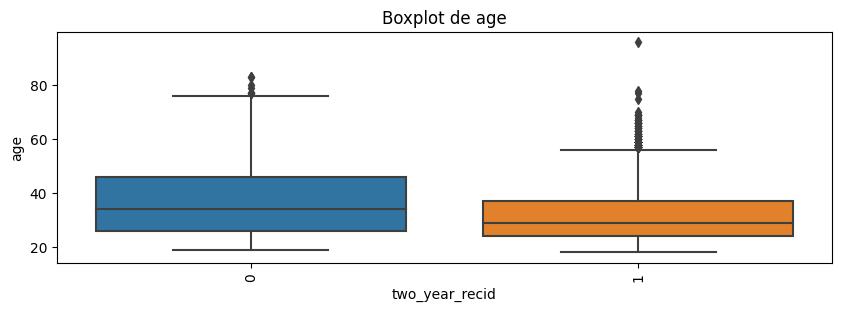

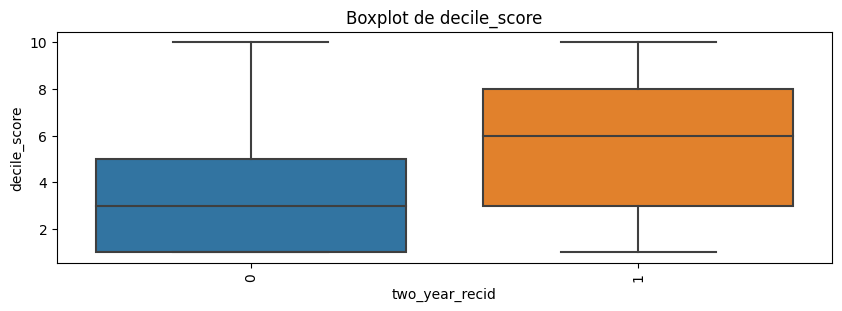

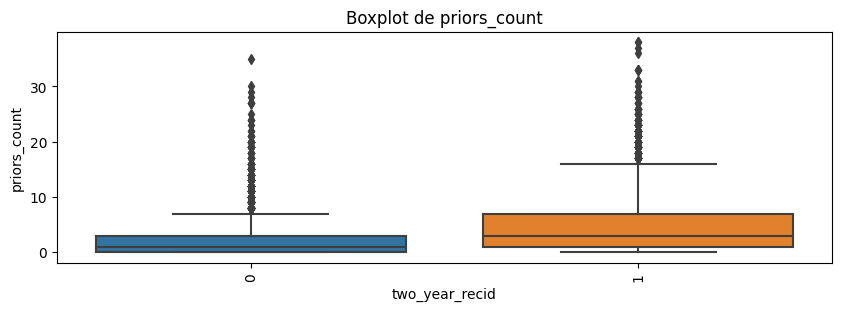

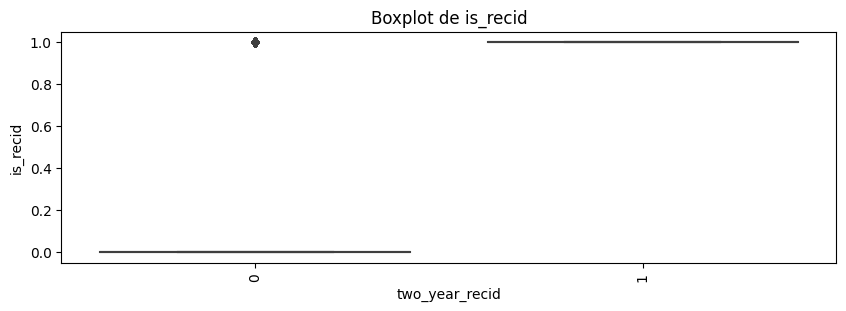

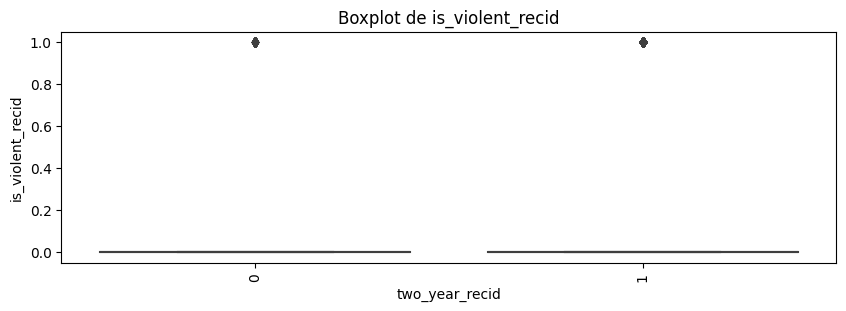

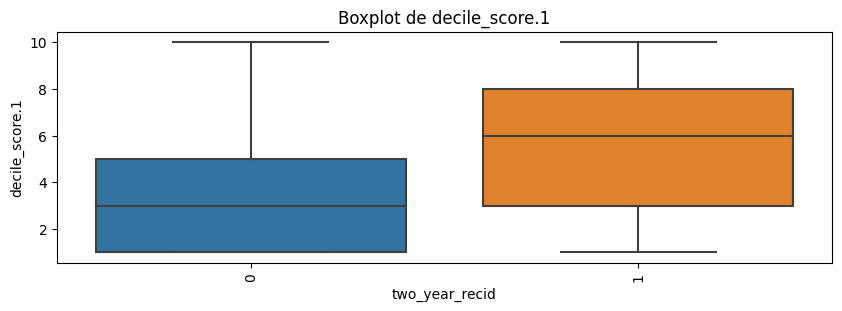

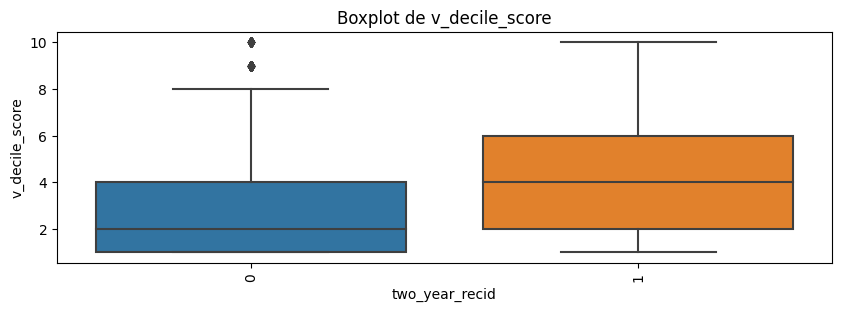

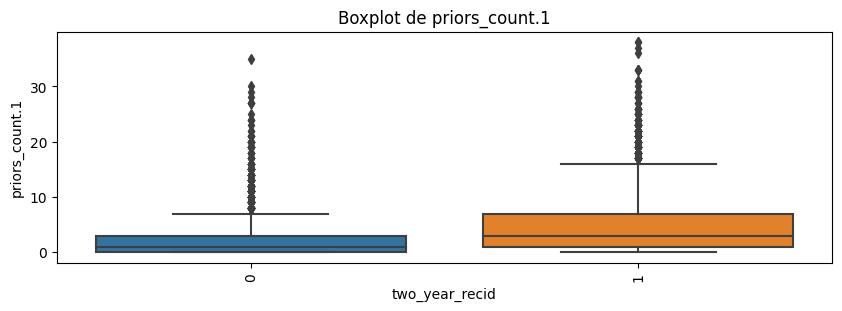

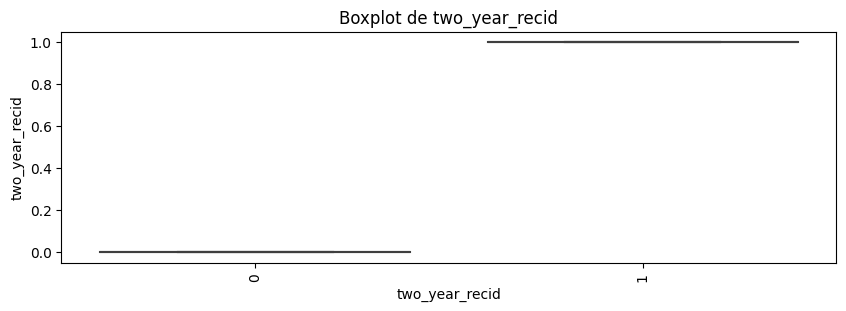

In [157]:
# Visualizar valores atípicos con boxplots
for col in df.columns:
    if df[col].dtype != "object":  # Solo graficar columnas numéricas
        plt.figure(figsize=(10,3))
        sns.boxplot(data=df, x=target, y=col)
        plt.title(f"Boxplot de {col}")
        plt.xticks(rotation=90)
        plt.show()


In [ ]:
df.shape

(396030, 27)

In [161]:
# Identificar y tratar valores atípicos
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Filtrar valores atípicos
left, right = df.align(IQR, axis=1, copy=False)
df_filtered = left[~((left < (Q1 - 1.5 * right)) | (left > (Q3 + 1.5 * right))).any(axis=1)]


# Mitigación de sesgos (si es necesario)
# Ejemplo: re-muestreo, ponderación, etc.

# Ingeniería de características (crear nuevas variables, transformar variables categóricas, etc.)

# Normalizar o estandarizar las variables (si es necesario)
scaler = StandardScaler()
# scaler = MinMaxScaler()

# Selecciona solo las columnas numéricas
numeric_columns = df_filtered.select_dtypes(include=[np.number]).columns

# Escala solo las columnas numéricas
scaler = StandardScaler()
df_filtered_scaled = df_filtered.copy()
df_filtered_scaled[numeric_columns] = scaler.fit_transform(df_filtered[numeric_columns])
df_filtered_scaled[target]=y
# Verificar el resultado
print(df_filtered_scaled.head())


        age c_charge_degree  decile_score  decile_score.1  is_recid  \
2 -0.913722               F     -0.058861       -0.058861  1.235695   
3 -1.000842               F      1.411055        1.411055 -0.809261   
4  0.741559               F     -1.161298       -1.161298 -0.809261   
5  0.828679               M     -1.161298       -1.161298 -0.809261   
7  0.741559               F     -0.058861       -0.058861 -0.809261   

   is_violent_recid  priors_count  priors_count.1              race   sex  \
2               0.0      0.557650        0.557650  African-American  Male   
3               0.0     -0.478765       -0.478765  African-American  Male   
4               0.0     -0.133293       -0.133293             Other  Male   
5               0.0     -0.824236       -0.824236             Other  Male   
7               0.0      0.212179        0.212179             Other  Male   

   two_year_recid  type_of_assessment  v_decile_score  
2               1  Risk of Recidivism       -0.198233 

In [162]:
df = df_filtered_scaled
# Calcular el coeficiente de asimetría para cada columna numérica
skewness = df[numeric_columns].skew()

# Imprimir el resultado
print("Coeficiente de asimetría de cada columna numérica:")
print(skewness)

Coeficiente de asimetría de cada columna numérica:
age                 0.803878
decile_score        0.526623
decile_score.1      0.526623
is_recid            0.426541
is_violent_recid    0.000000
priors_count        1.454776
priors_count.1      1.454776
two_year_recid      0.547415
v_decile_score      0.808402
dtype: float64


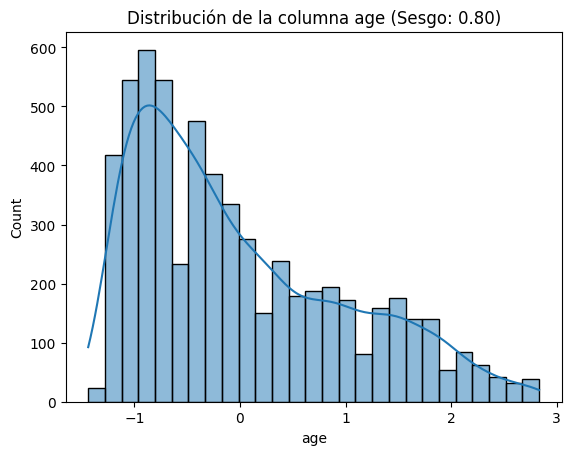

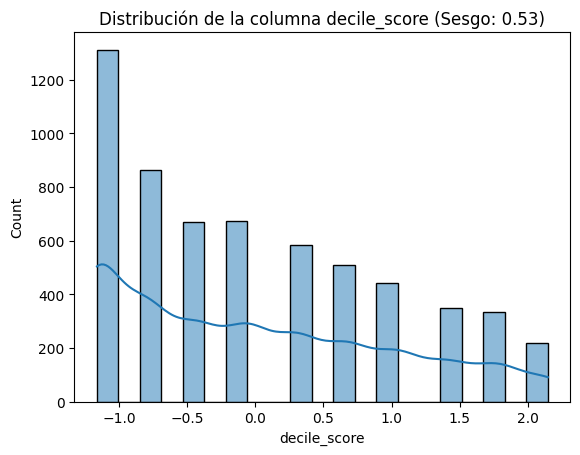

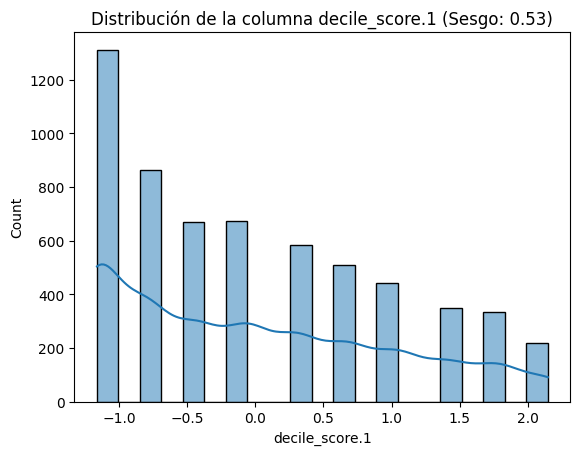

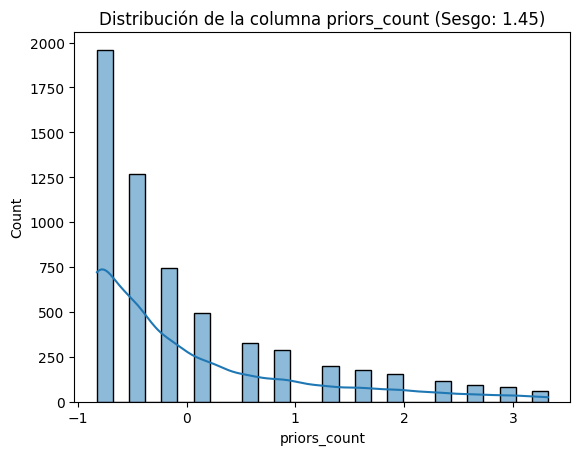

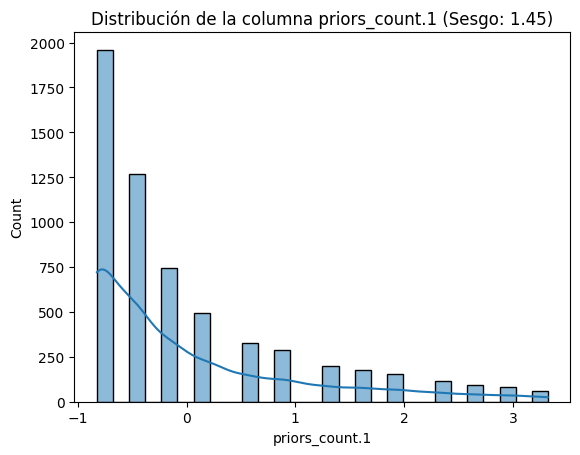

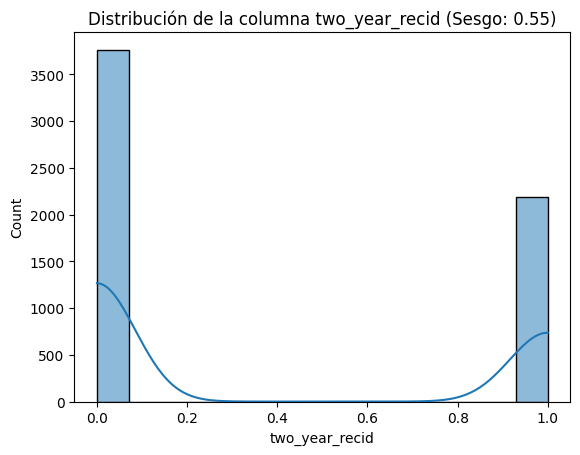

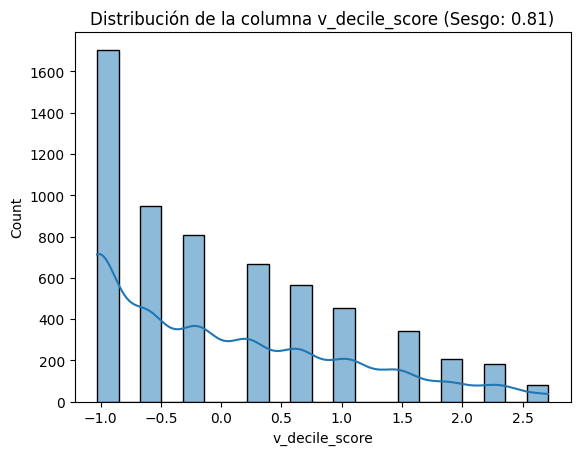

In [163]:
skewed_columns = skewness[abs(skewness) > 0.5].index

# Graficar las distribuciones de las columnas sesgadas
for column in skewed_columns:
    plt.figure()
    sns.histplot(data=df, x=column, kde=True)
    skew_value = skewness[column]
    plt.title(f"Distribución de la columna {column} (Sesgo: {skew_value:.2f})")
    plt.show()

In [19]:
skewed_columns

Index(['age', 'decile_score', 'decile_score.1', 'event', 'is_recid',
       'priors_count', 'priors_count.1', 'r_days_from_arrest', 'start',
       'two_year_recid', 'v_decile_score'],
      dtype='object')

In [ ]:
analyze_dataframe(df,"Compas")

In [ ]:
# Utilizando la función para analizar los DataFrames
notnull_columns_compas = analyze_dataframe(df_compas,"COMPAS")
notnull_columns_lending = analyze_dataframe(df_lending,"Lending")
notnull_columns_bank = analyze_dataframe(df_bank, "Bank")


Dataset: COMPAS
Tamaño inicial: (7214, 53)
Columnas con datos nulos: ['days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'c_charge_desc', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'in_custody', 'out_custody']
Si se eliminaran las filas con nulos, Tamaño final: (0, 53)
% de Filas a eliminar: 100.0
% de Columnas a eliminar: 41.509433962264154

Dataset: Lending
Tamaño inicial: (396030, 27)
Columnas con datos nulos: ['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies']
Si se eliminaran las filas con nulos, Tamaño final: (335868, 27)
% de Filas a eliminar: 15.191273388379667
% de Columnas a eliminar: 22.22222222222222

Dataset: Bank
Tamaño inicial: (41188, 21)
Columnas con datos nulos: []
Si se eliminaran las filas

In [ ]:
def remove_columns(list_columns,columns_to_remove):
  for column in columns_to_remove:
      if column in list_columns:
          list_columns.remove(column)


In [ ]:
remove_columns(notnull_columns_compas, ["name","id","first","last","age_cat" ])
print(notnull_columns_compas)

['compas_screening_date', 'sex', 'dob', 'age', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'is_recid', 'is_violent_recid', 'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date', 'priors_count.1', 'start', 'end', 'event', 'two_year_recid']


In [ ]:
notnull_columns_lending

In [ ]:
notnull_columns_bank

In [ ]:
df_compas_drop_column = df_compas[notnull_columns_compas]

In [ ]:
df_lending_drop_column = df_lending[notnull_columns_lending]

In [ ]:
df_bank_drop_column = df_bank[notnull_columns_bank]

In [ ]:
# Utilizando la función para analizar los DataFrames
_ = analyze_dataframe(df_compas_drop_column,"COMPAS")
_ = analyze_dataframe(df_lending_drop_column,"Lending")
_ = analyze_dataframe(df_bank_drop_column, "Bank")


Dataset: COMPAS
Tamaño inicial: (7214, 26)
Columnas con datos nulos: []
Si se eliminaran las filas con nulos, Tamaño final: (7214, 26)
% de Filas a eliminar: 0.0
% de Columnas a eliminar: 0.0

Dataset: Lending
Tamaño inicial: (396030, 21)
Columnas con datos nulos: []
Si se eliminaran las filas con nulos, Tamaño final: (396030, 21)
% de Filas a eliminar: 0.0
% de Columnas a eliminar: 0.0

Dataset: Bank
Tamaño inicial: (41188, 21)
Columnas con datos nulos: []
Si se eliminaran las filas con nulos, Tamaño final: (41188, 21)
% de Filas a eliminar: 0.0
% de Columnas a eliminar: 0.0


In [ ]:
text_columns_lending = df.select_dtypes(include='object').columns.tolist()
num_columns_lending = df.select_dtypes(include='int64').columns.tolist()

In [165]:
text_columns_compas = df_compas_drop_column.select_dtypes(include='object').columns.tolist()
num_columns_compas = df_compas_drop_column.select_dtypes(include='int64').columns.tolist()

NameError: ignored

In [166]:
text_columns_compas = df.select_dtypes(include='object').columns.tolist()
num_columns_compas = df.select_dtypes(include='int64').columns.tolist()

In [ ]:
text_columns_compas

In [ ]:
df_compas_drop_column.info()

In [ ]:
df_compas_drop_column[text_columns_compas]

In [ ]:
df_compas_drop_column.info()

In [168]:
le = LabelEncoder()
for etiqueta in text_columns_compas:
    df[etiqueta] = le.fit_transform(df[etiqueta])

In [ ]:
le = LabelEncoder()
for etiqueta in text_columns_compas:
    df_compas_drop_column[etiqueta] = le.fit_transform(df_compas_drop_column[etiqueta])

In [ ]:
le = LabelEncoder()
for etiqueta in text_columns_lending:
    df[etiqueta] = le.fit_transform(df[etiqueta])

def separated_data_target(df, target):
  return df.drop([target], axis = 1) , df[target]

In [ ]:
X,y = separated_data_target(df,target_lending)

KeyError: ignored

In [170]:
X,y = separated_data_target(df,target)

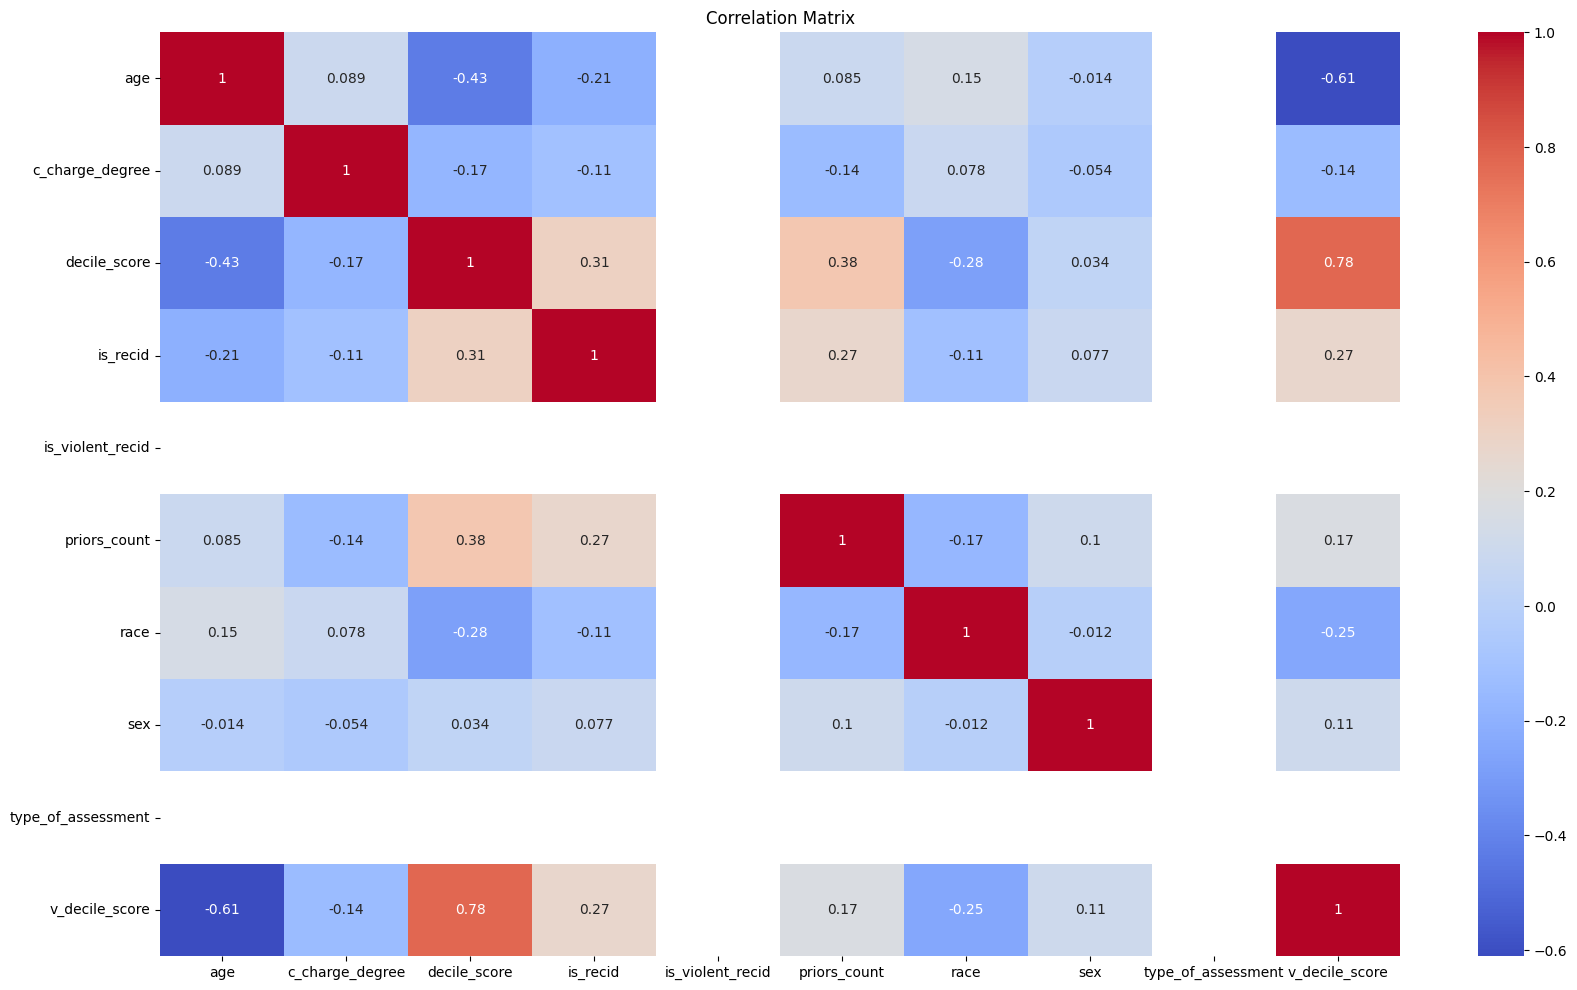

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df= X
# Supongamos que df es tu DataFrame
correlation_matrix = df.corr()

plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [174]:
# Umbral de correlación
threshold = 0.8

print(df.shape)
# Matriz de correlación absoluta
corr_matrix = df.corr().abs()

# Solo considerar la parte superior de la matriz de correlación
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Encontrar las columnas con correlación superior al umbral
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Eliminar las columnas
df = df.drop(df[to_drop], axis=1)
print(df.shape)

(5956, 12)
(5956, 10)


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
X = df

In [ ]:
X.shape

(7214, 19)

In [ ]:
X = df_compas_drop_column.iloc[:, 0:-1]
y = df_compas_drop_column.iloc[:, -1]

In [176]:
X

,age,c_charge_degree,decile_score,decile_score.1,is_recid,is_violent_recid,priors_count,priors_count.1,race,sex,type_of_assessment,v_decile_score
2,-0.913722,0,-0.058861,-0.058861,1.235695,0.0,0.557650,0.557650,0,1,0,-0.198233
3,-1.000842,0,1.411055,1.411055,-0.809261,0.0,-0.478765,-0.478765,0,1,0,1.048079
4,0.741559,0,-1.161298,-1.161298,-0.809261,0.0,-0.133293,-0.133293,5,1,0,-1.029107
5,0.828679,1,-1.161298,-1.161298,-0.809261,0.0,-0.824236,-0.824236,5,1,0,-1.029107
7,0.741559,0,-0.058861,-0.058861,-0.809261,0.0,0.212179,0.212179,5,1,0,-0.198233
...,...,...,...,...,...,...,...,...,...,...,...,...
7209,-1.000842,0,1.043576,1.043576,-0.809261,0.0,-0.824236,-0.824236,0,1,0,0.632642
7210,-1.000842,0,-0.426340,-0.426340,-0.809261,0.0,-0.824236,-0.824236,0,1,0,0.632642
7211,1.961240,0,-1.161298,-1.161298,-0.809261,0.0,-0.824236,-0.824236,5,1,0,-1.029107
7212,-0.129642,1,-0.793819,-0.793819,-0.809261,0.0,0.212179,0.212179,0,0,0,-0.613670


In [ ]:
y

0       1
1       3
2       4
3       8
4       1
       ..
7209    7
7210    3
7211    1
7212    2
7213    4
Name: decile_score, Length: 7214, dtype: int64

In [ ]:
df = df.fillna(df.mean())

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284860 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   address               284860 non-null  int64  
 1   annual_inc            284860 non-null  float64
 2   application_type      284860 non-null  int64  
 3   dti                   284860 non-null  float64
 4   earliest_cr_line      284860 non-null  int64  
 5   emp_length            284860 non-null  int64  
 6   emp_title             284860 non-null  int64  
 7   grade                 284860 non-null  int64  
 8   home_ownership        284860 non-null  int64  
 9   initial_list_status   284860 non-null  int64  
 10  installment           284860 non-null  float64
 11  issue_d               284860 non-null  int64  
 12  mort_acc              252393 non-null  float64
 13  open_acc              284860 non-null  float64
 14  pub_rec               284860 non-null  float64
 15  

In [177]:
# Dividir los datos en entrenamiento y prueba (70% para entrenamiento y 30% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de árbol de decisión con profundidad máxima de 5
modelo = DecisionTreeClassifier(max_depth=3)

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Calcular la precisión del modelo en los datos de prueba
accuracy = modelo.score(X_test, y_test)

# Imprimir la precisión del modelo
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))

Precisión del modelo: 97.09%


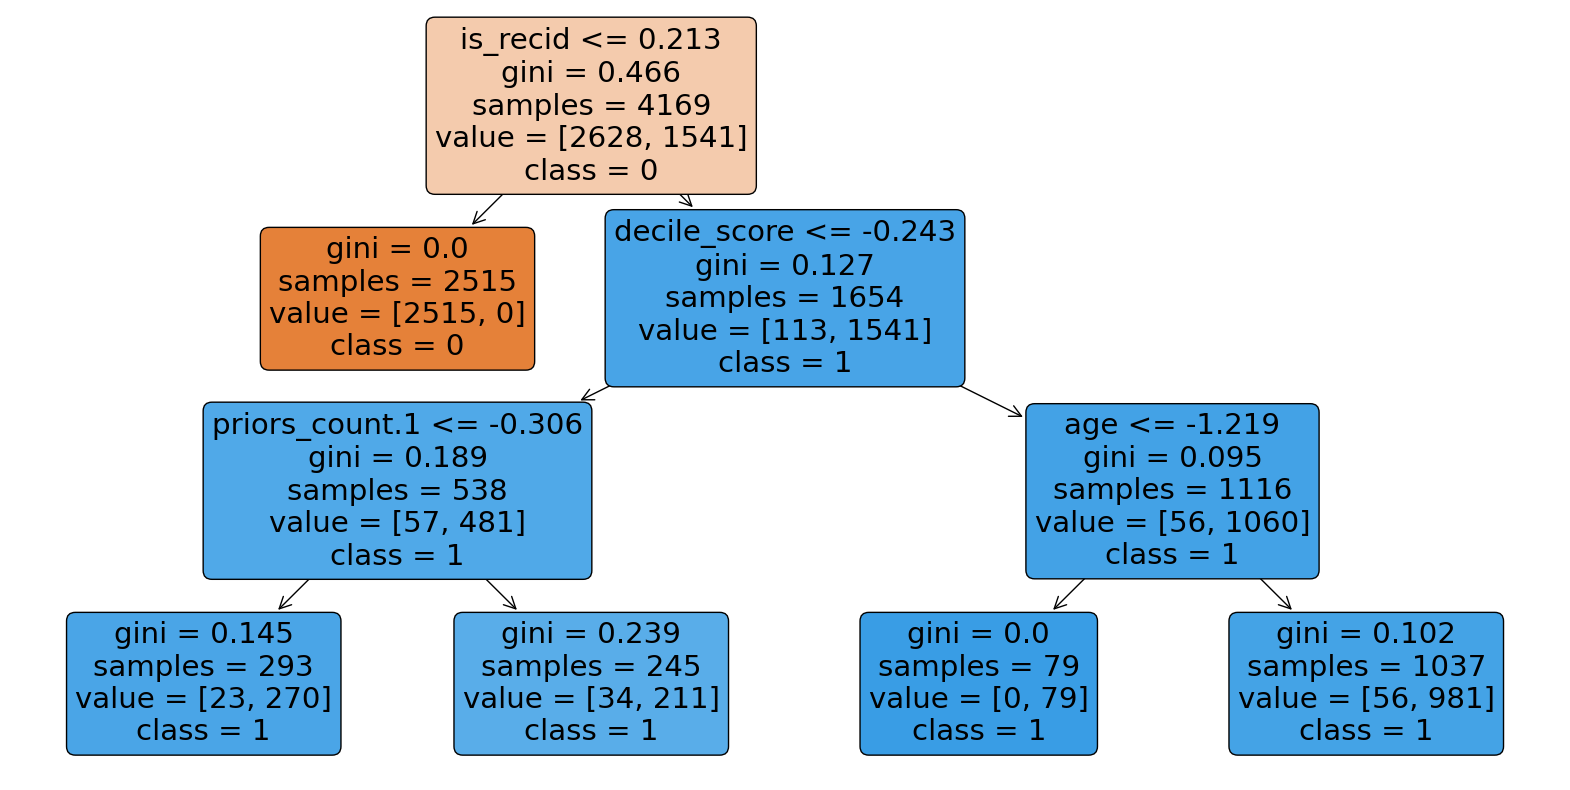

In [178]:

# Convertir los nombres de las clases a str
class_names_str = [str(x) for x in modelo.classes_]

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, class_names=class_names_str, filled=True, rounded=True)
plt.show()


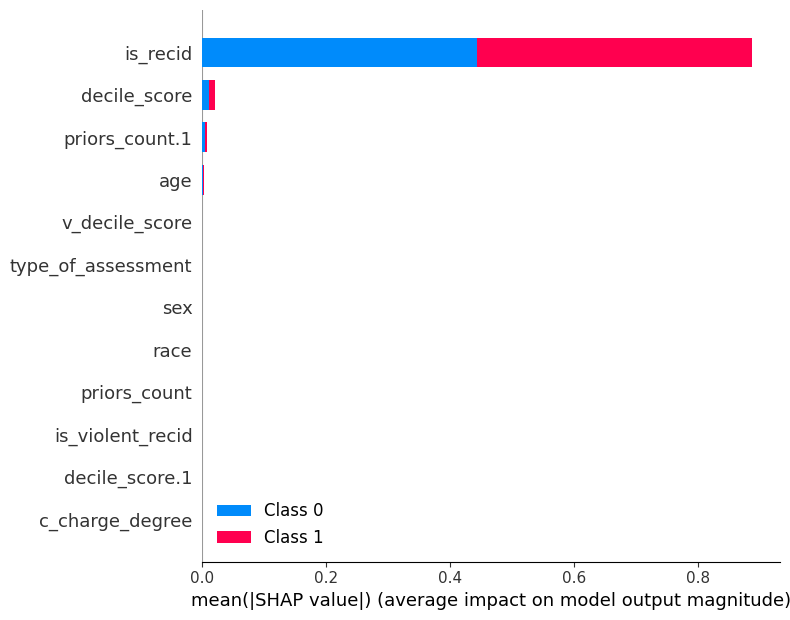

In [179]:
# Utilizar SHAP para explicar las predicciones
explainer_shap = shap.TreeExplainer(modelo)
shap_values = explainer_shap.shap_values(X_test)

# Para SHAP
shap.summary_plot(shap_values, X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compila el modelo
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Entrena el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluar el modelo
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: %.2f" % (accuracy*100))

# Realiza predicciones
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)


Epoch 1/50
158/158 [==============================] - 1s 3ms/step - loss: -16361.8096 - accuracy: 0.1804 - val_loss: -55719.7148 - val_accuracy: 0.2060
Epoch 2/50
158/158 [==============================] - 0s 3ms/step - loss: -214842.2656 - accuracy: 0.1969 - val_loss: -497959.5000 - val_accuracy: 0.2060
Epoch 3/50
158/158 [==============================] - 0s 2ms/step - loss: -1042522.8750 - accuracy: 0.1969 - val_loss: -1828129.2500 - val_accuracy: 0.2060
Epoch 4/50
158/158 [==============================] - 0s 2ms/step - loss: -2960887.5000 - accuracy: 0.1969 - val_loss: -4478753.0000 - val_accuracy: 0.2060
Epoch 5/50
158/158 [==============================] - 0s 3ms/step - loss: -6360211.0000 - accuracy: 0.1969 - val_loss: -8803684.0000 - val_accuracy: 0.2060
Epoch 6/50
158/158 [==============================] - 0s 2ms/step - loss: -11500860.0000 - accuracy: 0.1969 - val_loss: -15004327.0000 - val_accuracy: 0.2060
Epoch 7/50
158/158 [==============================] - 0s 2ms/step - 

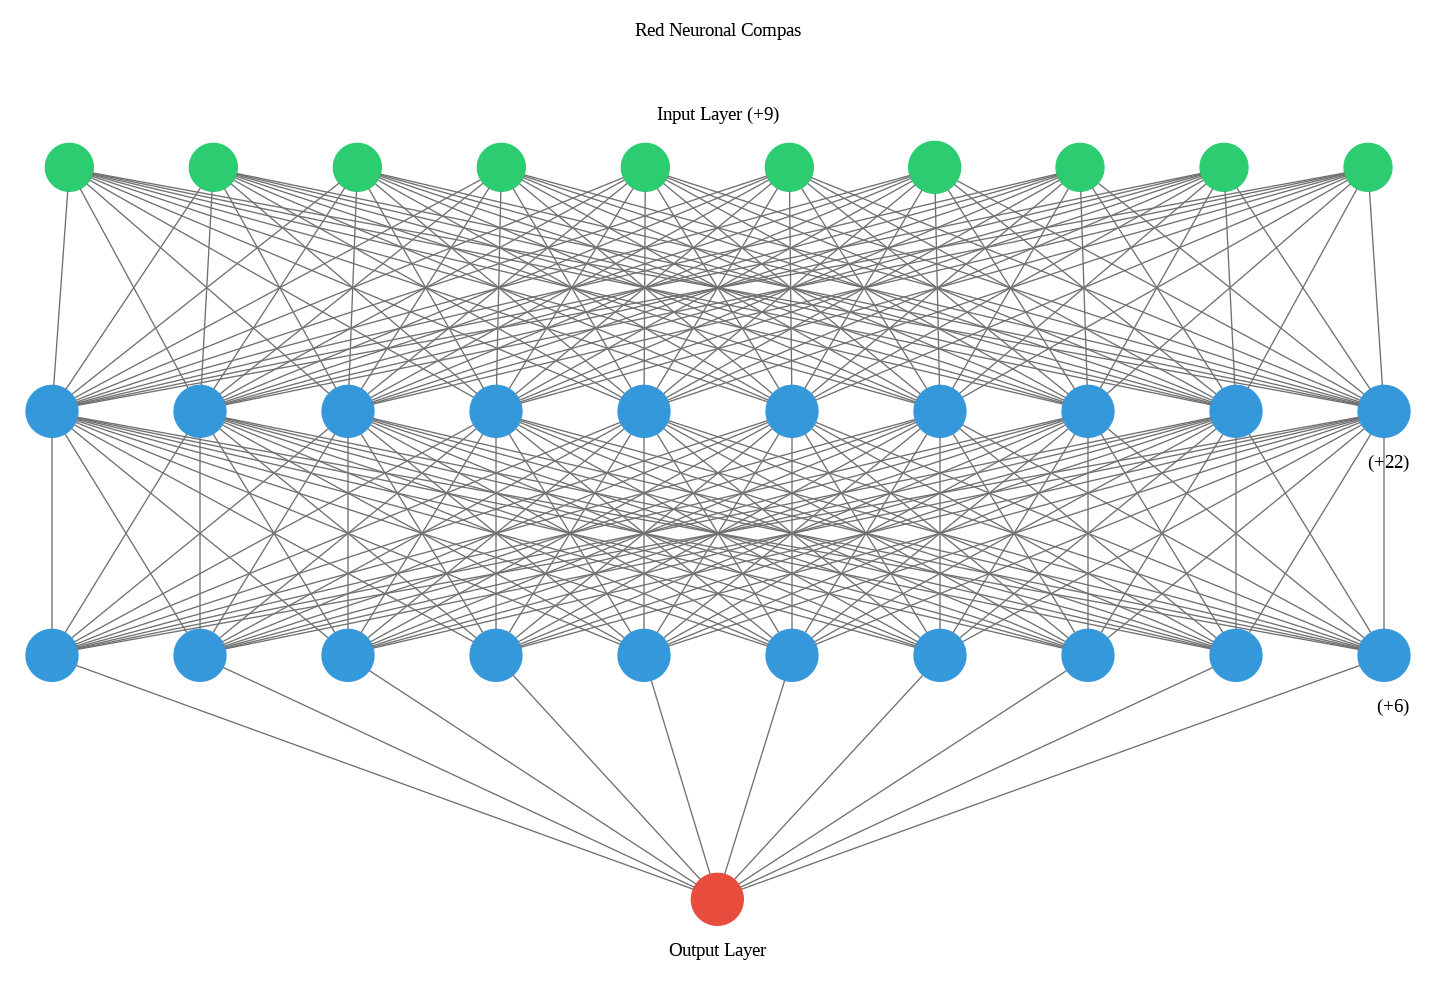

In [ ]:


ann_viz(model, view=True, filename="redNeuronal.gv", title="Red Neuronal Compas")
!dot -Tpng redNeuronal.gv -o redNeuronal.png


Image(filename='redNeuronal.png')

In [ ]:
#  Utilizar SHAP para explicar las predicciones
explainer_shap = shap.DeepExplainer(model,X_train.values)
shap_values = explainer_shap.shap_values(X_test.values)

# Para SHAP
shap.summary_plot(shap_values,X_test)


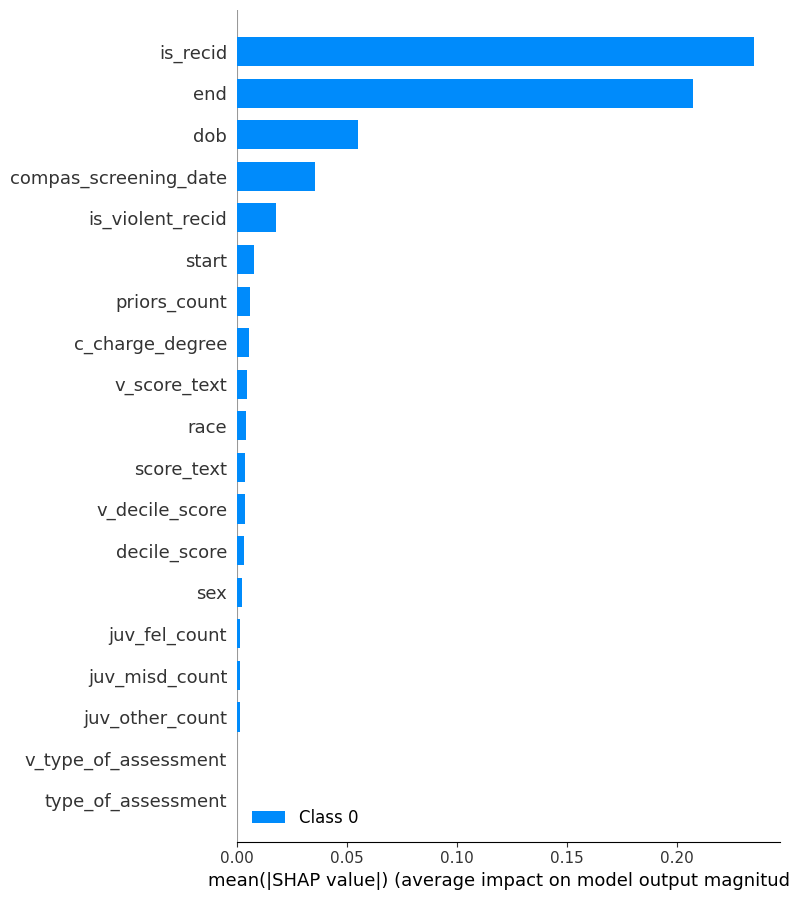

In [ ]:
shap.summary_plot(shap_values,X_test)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


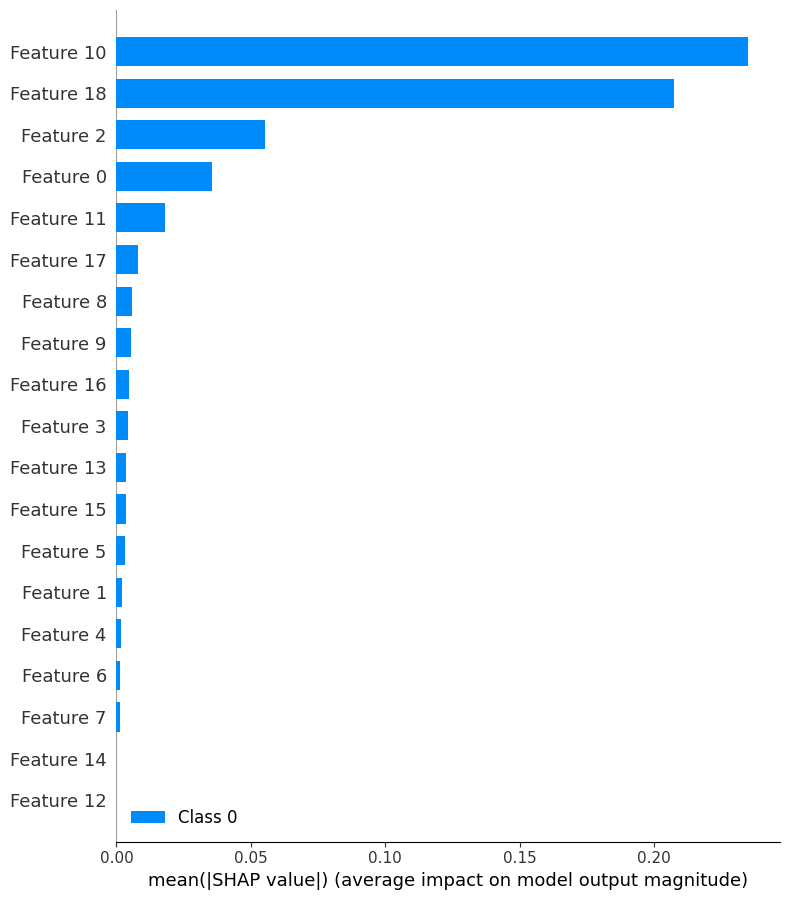

In [ ]:

#  Utilizar SHAP para explicar las predicciones
explainer_shap = shap.DeepExplainer(model, X_train.values)
shap_values = explainer_shap.shap_values(X_test.values)

# Para SHAP
shap.summary_plot(shap_values, X_test)


In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn import metrics

# dictionnary of metrics
metrics_dict={
        "Accuracy": metrics.accuracy_score,
        "Balanced accuracy": metrics.balanced_accuracy_score,
        "Precision": metrics.precision_score,
        "Recall": metrics.recall_score,
        "F1-Score": metrics.f1_score}

# efficacy metrics dataframe helper tool
def metrics_dataframe(y_pred, y_true, metrics_dict=metrics_dict):
    metric_list = [[pf, fn(y_true, y_pred)] for pf, fn in metrics_dict.items()]
    return pd.DataFrame(metric_list, columns=["Metric", "Value"]).set_index("Metric")

In [ ]:
metrics.recall_score(y_pred, y_test)

ValueError: ignored

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear objeto Random Forest y ajustar el modelo a los datos de entrenamiento
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Obtener el primer árbol de decisión del modelo
estimator = rf.estimators_[0]



print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

#tarda 2 segundos

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       446
           2       1.00      1.00      1.00       285
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       205
           5       1.00      1.00      1.00       211
           6       1.00      1.00      1.00       189
           7       1.00      1.00      1.00       163
           8       1.00      1.00      1.00       144
           9       0.99      1.00      1.00       153
          10       1.00      0.99      1.00       129

    accuracy                           1.00      2165
   macro avg       1.00      1.00      1.00      2165
weighted avg       1.00      1.00      1.00      2165

Confusion Matrix:
[[446   0   0   0   0   0   0   0   0   0]
 [  0 285   0   0   0   0   0   0   0   0]
 [  0   0 240   0   0   0   0   0   0   0]
 [  0   0   0 205   0   0   0   0   0   0]
 [  0   0   0   0 211   0   

In [ ]:
# Exportar el árbol de decisión a un archivo DOT
dot_data = export_graphviz(estimator, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# Convertir el archivo DOT a un archivo PNG y mostrarlo
Image(graph.create_png())



Output hidden; open in https://colab.research.google.com to view.

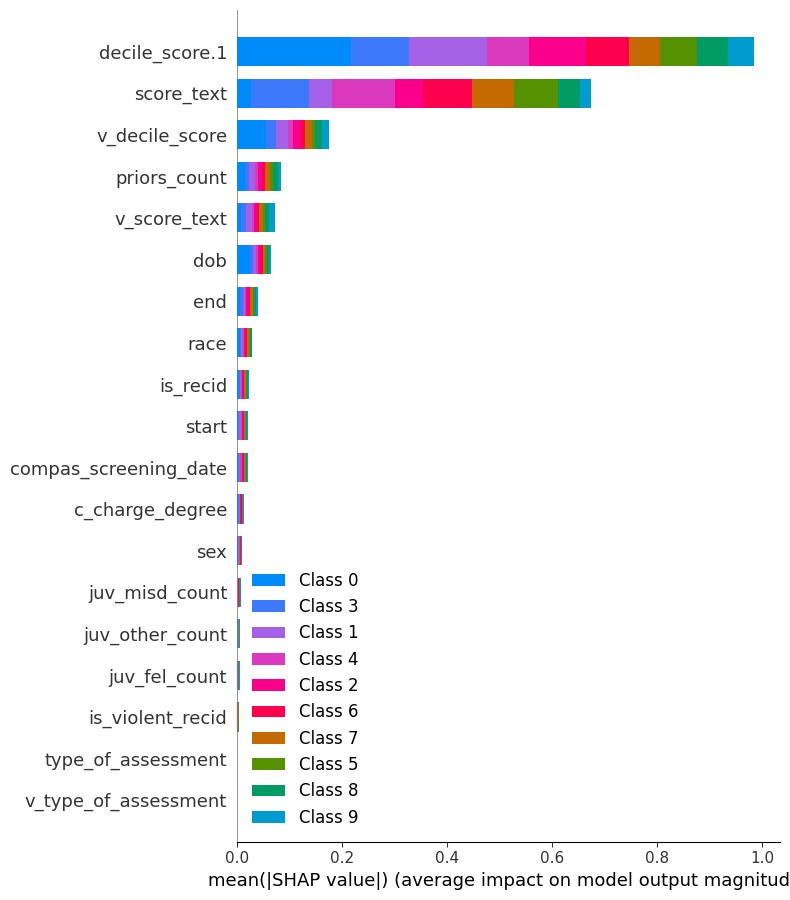

In [ ]:

# Utilizar SHAP para explicar las predicciones
explainer_shap = shap.TreeExplainer(rf)
shap_values = explainer_shap.shap_values(X_test)

# Para SHAP
shap.summary_plot(shap_values, X_test)



In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Puedes cambiar el kernel y otros parámetros aquí
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

#tardó 1:48 minutos en ejecutarse....

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       446
           2       1.00      1.00      1.00       285
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       205
           5       1.00      1.00      1.00       211
           6       0.99      1.00      1.00       189
           7       1.00      0.99      1.00       163
           8       0.99      0.99      0.99       144
           9       0.99      0.99      0.99       153
          10       1.00      1.00      1.00       129

    accuracy                           1.00      2165
   macro avg       1.00      1.00      1.00      2165
weighted avg       1.00      1.00      1.00      2165

Confusion Matrix:
[[446   0   0   0   0   0   0   0   0   0]
 [  0 285   0   0   0   0   0   0   0   0]
 [  0   1 239   0   0   0   0   0   0   0]
 [  0   0   0 205   0   0   0   0   0   0]
 [  0   0   0   0 211   0   

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/5 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names


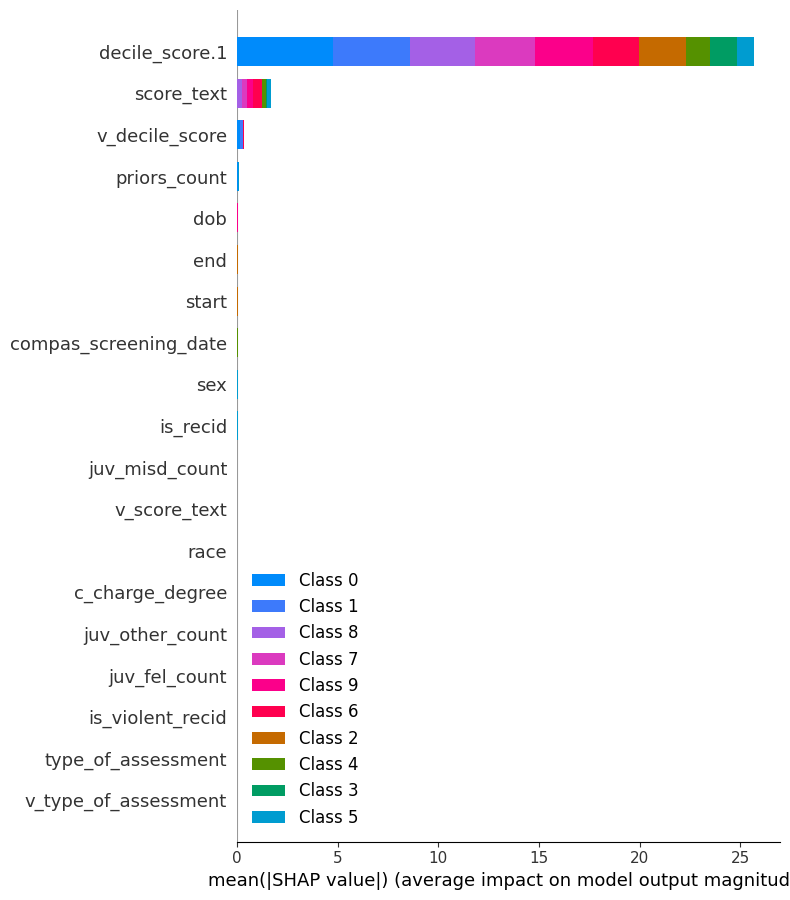

In [ ]:
import shap

# Utilizar SHAP para explicar las predicciones
def predict_wrapper(X):
    return svm.decision_function(X)

# Seleccionar un subconjunto de los datos de prueba ya que al ser muy grande, el proceso para encontrar los Shape es muy largo
X_test_subset = X_test.sample(5, random_state=42)

explainer_shap = shap.KernelExplainer(predict_wrapper, X_train)
shap_values = explainer_shap.shap_values(X_test_subset, nsamples=50)  # Reducir el número de muestras para acelerar el cómputo

# Para SHAP
shap.summary_plot(shap_values, X_test_subset)


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear objeto Gradient Boosting y ajustar el modelo a los datos de entrenamiento
modelo = XGBClassifier(random_state=42)
modelo.fit(X_train, y_train-1)

y_pred = modelo.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred+1))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred+1))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred+1))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       446
           2       1.00      1.00      1.00       285
           3       1.00      1.00      1.00       240
           4       1.00      1.00      1.00       205
           5       1.00      1.00      1.00       211
           6       1.00      1.00      1.00       189
           7       1.00      1.00      1.00       163
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       153
          10       1.00      1.00      1.00       129

    accuracy                           1.00      2165
   macro avg       1.00      1.00      1.00      2165
weighted avg       1.00      1.00      1.00      2165

Confusion Matrix:
[[446   0   0   0   0   0   0   0   0   0]
 [  0 285   0   0   0   0   0   0   0   0]
 [  0   0 240   0   0   0   0   0   0   0]
 [  0   0   0 205   0   0   0   0   0   0]
 [  0   0   0   0 211   0   

100%|===================| 21621/21650 [01:25<00:00]       

TypeError: ignored

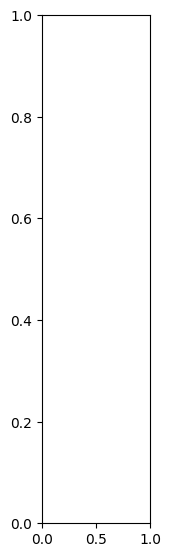

In [ ]:

# Utilizar SHAP para explicar las predicciones
explainer = shap.Explainer(modelo, X_train)
# Calcular los valores SHAP para los datos de prueba
shap_values = explainer(X_test)

# Mostrar el gráfico de resumen SHAP para los datos de prueba
shap.summary_plot(shap_values)

